# NetworkX 파이썬 패키지를 이용한 SNA

## NetworkX란? 그래프와 네트워크 연구를 위한 파이썬 라이브러리

In [34]:
g = nx.Graph() # g라는 변수명에 네트워크의 속성 부여

C:\ana\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


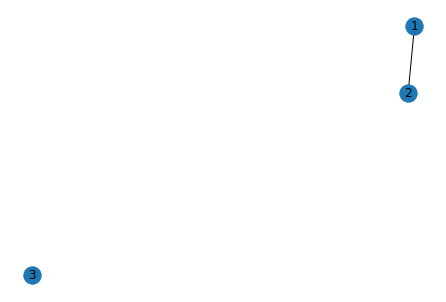

In [35]:
g.add_node(1) # 노드 '1' 추가
g.add_nodes_from([2,3]) # 노드 '2', '3' 추가
g.add_edge(1,2) # 노드 '1'과 '2' 사이의 링크 형성
nx.draw(g,with_labels = True  # 'g' 네트워크 그림 그리기

In [48]:
g1 = nx.Graph() # 'g1' 라는 변수명에 네트워크 속성 부여
g1.add_node('apple') # g1에 'apple' 노드 추가
g1.add_node('kiwi',kind='fruit') # g1에 'kiwi' 노드를 'kind'라는 속성과 함께 추가

fruits = ['banana','mango'] # 'fruits' 이름의 list 형성
g1.add_nodes_from(fruits) # list 항목들을 node에 추가
g1.nodes()

NodeView(('apple', 'kiwi', 'banana', 'mango'))

In [49]:
g1.node['kiwi']['kind'] = 'fruit' #기존 노드 'kiwi'에 'kind' 속성을 'fruit'이라 할당
g1.add_node('kiwi',kind='fruit') #새 node 'kiwi'에 'kind' 속성을 'fruit'이라 할당 
g1.add_nodes_from(['banana','apple','mango'],kind='fruit')
# list에 동일한 속성 부여
 
g1.node['kiwi'] 
g1.nodes()
g1.nodes(data=True)

NodeDataView({'apple': {'kind': 'fruit'}, 'kiwi': {'kind': 'fruit'}, 'banana': {'kind': 'fruit'}, 'mango': {'kind': 'fruit'}})

In [50]:
g1 = nx.Graph()
g1.add_edge('apple','banana') # 엣지 추가
edges = [('apple','mango'),('apple','kiwi')] # edges 라는 변수명에 list로 edge추가
g1.add_edges_from(edges) 
g1.edges()

EdgeView([('apple', 'banana'), ('apple', 'mango'), ('apple', 'kiwi')])

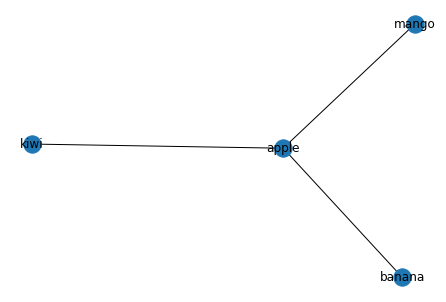

In [52]:
nx.draw(g1,with_labels = True) # 'g1' 네트워크 그림 그리기

## 응용: NetworkX를 이용한 왕좌의 게임 등장인물 네트워크 분석

In [31]:
# 필요한 라이브러리 호출
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os 

os.chdir('C:/Users/신창훈/Downloads')
all_books = ['asoiaf-all-edges.csv', 'asoiaf-all-nodes.csv']

li = []
for f in all_books:
    tmp = pd.read_csv(f)
    li.append(tmp)
# for 문을 활용해 불러온 데이터들을 빈 리스트에 할당

In [32]:
df = pd.concat(li, axis=0, ignore_index=True) #합치기
df = df[['Source', 'Target']] #source, target 컬럼만 남기기
df.drop_duplicates(subset=['Source', 'Target'], inplace=True) #겹치는 데이터 삭제 

G = nx.from_pandas_edgelist(df,  source='Source', target='Target')

print(len(G.nodes())) 
print(len(G.edges())) 

797
2824


C:\ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
# 매개중심성 척도 계산
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# 연걸중심성 척도 계산
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# page_rank 척도 계산
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# 근접중심성 척도 계산
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Tyrion-Lannister', 0.47573472515362913),
 ('Robert-Baratheon', 0.4586951220574275),
 ('Eddard-Stark', 0.4552759497026417),
 ('Cersei-Lannister', 0.45397441754225676),
 ('Jaime-Lannister', 0.4513935510411638)]